## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# lets import the necessary files
movie_gross_df = pd.read_csv('bom.movie_gross.csv.gz')
rating_df = pd.read_csv('rt.movie_info.tsv.gz', sep = '\t')
reviews_df = pd.read_csv('rt.reviews.tsv.gz', sep = '\t', encoding = 'ISO-8859-1')
movies_df = pd.read_csv('tmdb.movies.csv.gz')
movie_budget_df = pd.read_csv('tn.movie_budgets.csv.gz')

FileNotFoundError: [Errno 2] No such file or directory: 'bom.movie_gross.csv.gz'

In [4]:
rating_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# Analysis from the movie budget

In [5]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
movie_budget_df.shape

(5782, 6)

In [7]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [59]:
movie_budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

# Metric question one: Which movie has the highest return on investment..

# Step 1.. Data Cleaning

In [60]:
movie_budget_df['production_budget'] = pd.to_numeric(movie_budget_df['production_budget'].astype(str).str.replace('[^\d]', '', regex = True), errors = 'coerce')
movie_budget_df['production_budget']

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: int64

In [61]:
movie_budget_df['production_budget'] = pd.to_numeric(movie_budget_df['production_budget'].astype(str).str.replace('[^\d]', '', regex = True), errors = 'coerce')

movie_budget_df['domestic_gross'] = pd.to_numeric(movie_budget_df['domestic_gross'].astype(str).str.replace('[^\d]', '', regex = True), errors = 'coerce')

movie_budget_df['worldwide_gross'] =  pd.to_numeric(movie_budget_df['worldwide_gross'].astype(str).str.replace('[^\d]', '', regex = True), errors = 'coerce')

In [62]:
# Determine the return on investment..
movie_budget_df['return_on_investment'] = (movie_budget_df['worldwide_gross'] - movie_budget_df['production_budget']) / movie_budget_df['production_budget']
movie_budget_df['return_on_investment'].value_counts()

return_on_investment
-1.000000      367
 5.000000        3
 8.000000        3
 2.600000        3
-0.888421        2
              ... 
-0.887856        1
-0.863831        1
 1.497355        1
-0.431399        1
 163.582727      1
Name: count, Length: 5400, dtype: int64

In [63]:
# lets find the movie with the highest return on investment..
movie_highest_return = movie_budget_df.loc[movie_budget_df['return_on_investment'].idxmax()]
print("Here is the Top movie with the highest ROI:\n", movie_highest_return)


Here is the Top movie with the highest ROI:
 id                                46
release_date            Jun 30, 1972
movie                    Deep Throat
production_budget              25000
domestic_gross              45000000
worldwide_gross             45000000
return_on_investment          1799.0
Name: 5745, dtype: object


# Merge the movie_budget_df and rating_df to analyze each movie by genre

In [64]:
rating_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [65]:
rating_df.shape

(1560, 12)

In [66]:
# Lets split the genre column
rating_df['genre_split1'] = rating_df['genre'].str.split('|')

# using the explode function to create a new row containing each genre seperately..
exploded_rating_df = rating_df.explode('genre_split1')

# check the first few rows to verify the transformation..
exploded_rating_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_split1
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Science Fiction and Fantasy


In [67]:
# select the relevant columns for the analysis
new_rating_df = exploded_rating_df[['id', 'rating', 'genre_split1', 'director', 'runtime', 'box_office']]
new_rating_df = new_rating_df.rename(columns = {'genre_split1':'genre'})
new_rating_df.head()

,id,rating,genre,director,runtime,box_office
0,1,R,Action and Adventure,William Friedkin,104 minutes,NaN
0,1,R,Classics,William Friedkin,104 minutes,NaN
0,1,R,Drama,William Friedkin,104 minutes,NaN
1,3,R,Drama,David Cronenberg,108 minutes,"600,000"
1,3,R,Science Fiction and Fantasy,David Cronenberg,108 minutes,"600,000"


# Data Cleaning..
Here we clean the rating_df DataFrame

In [68]:
new_rating_df.head()

,id,rating,genre,director,runtime,box_office
0,1,R,Action and Adventure,William Friedkin,104 minutes,NaN
0,1,R,Classics,William Friedkin,104 minutes,NaN
0,1,R,Drama,William Friedkin,104 minutes,NaN
1,3,R,Drama,David Cronenberg,108 minutes,"600,000"
1,3,R,Science Fiction and Fantasy,David Cronenberg,108 minutes,"600,000"


In [69]:
new_rating_df.shape

(3581, 6)

In [70]:
new_rating_df.isna().sum().sort_values(ascending = False)

box_office    2857
director       443
runtime         52
genre            8
rating           3
id               0
dtype: int64

# Handle the missing values for each column

In [71]:
# Lets drop the rows with missing values..
new_rating_df.dropna(subset = ['genre'], inplace = True)
new_rating_df.dropna(subset = ['rating'], inplace = True)

# assign the missing values in director a placeholder (Not Specified)
new_rating_df['director'].fillna('Not Specified', inplace = True)

# handle the missing values by filling the runtime with mode
runtime_mode = new_rating_df['runtime'].mode()[0]

new_rating_df['runtime'].fillna(runtime_mode, inplace=True)

# Fill the missing values in box_office with 0..
new_rating_df['box_office'].fillna(0, inplace = True)


In [72]:
new_rating_df.isna().sum().sort_values(ascending = False)

id            0
rating        0
genre         0
director      0
runtime       0
box_office    0
dtype: int64

In [73]:
new_rating_df.head()

,id,rating,genre,director,runtime,box_office
0,1,R,Action and Adventure,William Friedkin,104 minutes,0
0,1,R,Classics,William Friedkin,104 minutes,0
0,1,R,Drama,William Friedkin,104 minutes,0
1,3,R,Drama,David Cronenberg,108 minutes,"600,000"
1,3,R,Science Fiction and Fantasy,David Cronenberg,108 minutes,"600,000"


In [74]:
# Remove the string on the minutes then convert to an interger..
new_rating_df['runtime'] = new_rating_df['runtime'].str.replace('minutes', '', regex = False).astype(int)

In [75]:
new_rating_df.head()

,id,rating,genre,director,runtime,box_office
0,1,R,Action and Adventure,William Friedkin,104,0
0,1,R,Classics,William Friedkin,104,0
0,1,R,Drama,William Friedkin,104,0
1,3,R,Drama,David Cronenberg,108,"600,000"
1,3,R,Science Fiction and Fantasy,David Cronenberg,108,"600,000"


In [76]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696


In [77]:
# Here we merge the movie_budget_df with the new_rating_df to identify the specific genre of certain movie..
merged_data_df = movie_budget_df.merge(new_rating_df, on = 'id', how = 'left')
merged_data_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,rating,genre,director,runtime,box_office
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577,R,Action and Adventure,William Friedkin,104.0,0
1,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577,R,Classics,William Friedkin,104.0,0
2,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577,R,Drama,William Friedkin,104.0,0
3,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673,NaN,NaN,NaN,NaN,NaN
4,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-0.572108,R,Drama,David Cronenberg,108.0,"600,000"


In [78]:
merged_data_df.shape

(11211, 12)

In [79]:
merged_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11211 entries, 0 to 11210
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11211 non-null  int64  
 1   release_date          11211 non-null  object 
 2   movie                 11211 non-null  object 
 3   production_budget     11211 non-null  int64  
 4   domestic_gross        11211 non-null  int64  
 5   worldwide_gross       11211 non-null  int64  
 6   return_on_investment  11211 non-null  float64
 7   rating                10053 non-null  object 
 8   genre                 10053 non-null  object 
 9   director              10053 non-null  object 
 10  runtime               10053 non-null  float64
 11  box_office            10053 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [80]:
# Here lets select specific columns to visualize.
selected_df = merged_data_df[['movie', 'genre', 'production_budget', 'domestic_gross', 'worldwide_gross', 'return_on_investment', 'director']]
new_movie_rating_df = selected_df.copy(deep = True)
# new_movie_rating_df.head()

In [81]:
new_movie_rating_df.isna().sum().sort_values(ascending = False)

genre                   1158
director                1158
movie                      0
production_budget          0
domestic_gross             0
worldwide_gross            0
return_on_investment       0
dtype: int64

In [82]:
# fill the missing values in genre and director columns with 0
new_movie_rating_df[['genre', 'director']] = new_movie_rating_df[['genre', 'director']].fillna(0)

In [83]:
new_movie_rating_df.isna().sum().sort_values(ascending = False)

movie                   0
genre                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
return_on_investment    0
director                0
dtype: int64

In [84]:
new_movie_rating_df.head()

,movie,genre,production_budget,domestic_gross,worldwide_gross,return_on_investment,director
0,Avatar,Action and Adventure,425000000,760507625,2776345279,5.532577,William Friedkin
1,Avatar,Classics,425000000,760507625,2776345279,5.532577,William Friedkin
2,Avatar,Drama,425000000,760507625,2776345279,5.532577,William Friedkin
3,Pirates of the Caribbean: On Stranger Tides,0,410600000,241063875,1045663875,1.546673,0
4,Dark Phoenix,Drama,350000000,42762350,149762350,-0.572108,David Cronenberg


# metric question one:  Which top directors had the highest return on investment


In [85]:
# metric question: which top 10 genres had the highest return on investment
top_directors_genre = new_movie_rating_df.groupby(['director', 'genre'])['return_on_investment'].mean().reset_index()

# sort the directors by return_on_investment in descending order
top_directors_ROI = top_directors_genre.sort_values(by = 'return_on_investment', ascending = False)

# get the Top 10 directors with the highest return_on_investment
top_10_directors_ROI = top_directors_ROI.head(10)
print(top_10_directors_ROI)

            director                        genre  return_on_investment
106   Peter Cattaneo                       Comedy             32.404857
107   Peter Cattaneo  Musical and Performing Arts             32.404857
131  Taylor Hackford                        Drama             11.961900
118   Rodney Bennett                        Drama             11.542876
119   Rodney Bennett                      Romance             11.542876
36    Ernst Lubitsch                      Romance              9.666349
35    Ernst Lubitsch                        Drama              9.666349
34    Ernst Lubitsch                       Comedy              9.666349
33    Ernst Lubitsch                     Classics              9.666349
140    Werner Herzog                        Drama              8.285698


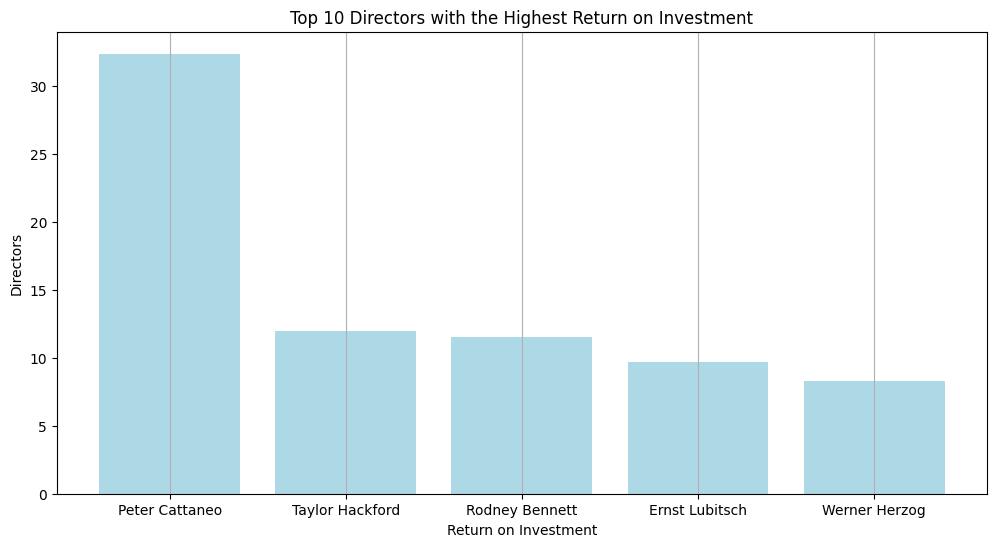

In [86]:
# Lets visualize the top 10 directors with the highest return on investment..
plt.figure(figsize = (12, 6))
plt.bar(top_10_directors_ROI['director'], top_10_directors_ROI['return_on_investment'], color = 'lightblue')
plt.title("Top 10 Directors with the Highest Return on Investment")
plt.xlabel("Return on Investment")
plt.ylabel("Directors")
plt.grid(axis = 'x')
plt.show()

# metric question two: Which Top genres had the highest return on investment

In [89]:
# Lets Group by genre then calculate the mean return_on_investment for each genre
top_10_genre_ROI = new_movie_rating_df.groupby('genre')['return_on_investment'].mean().reset_index()

# sort the genres by return on investement in descending order..
top_genre_by_ROI = top_10_genre_ROI.sort_values(by = 'return_on_investment', ascending = False)
top_10_genre_ROI = top_genre_by_ROI.head(10)
print(top_10_genre_ROI)

                          genre  return_on_investment
9   Musical and Performing Arts              6.454714
11                      Romance              4.597606
4                        Comedy              4.529521
0                             0              3.582253
2   Art House and International              3.554128
12  Science Fiction and Fantasy              3.533028
3                      Classics              3.509159
5                   Documentary              3.503014
6                         Drama              3.501497
8               Kids and Family              3.345166


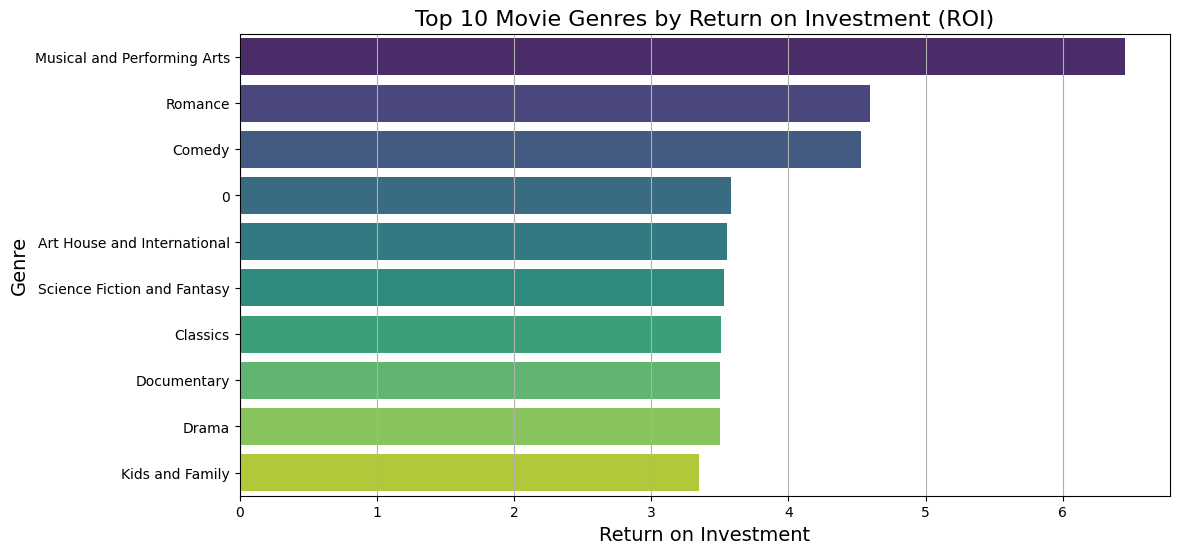

In [90]:
# Create a bar plot for the top 10 genres by ROI
plt.figure(figsize=(12, 6))
sns.barplot(x = 'return_on_investment', y = 'genre', data = top_10_genre_ROI, palette='viridis', hue = 'genre', legend = False)

# Adding title and labels
plt.title('Top 10 Movie Genres by Return on Investment (ROI)', fontsize=16)
plt.xlabel('Return on Investment', fontsize=14)
plt.ylabel('Genre', fontsize=14)

# Show the plot
plt.grid(axis='x')
plt.show()

# Conclusion:
The genre with the highest return on investement is the Musical and Performing Arts  with the return on investment value of 6.454714.

# Recommendations:
My suggestion would be to focus on the Top three genres; Musical and Performing Arts, Romance and Comedy which should help the New Movie Studio focus more on maximizing financial return as well enhancing the overall profitability.


In [91]:
# Metric question two: whats the correlation production budget and worldwide gross
correlation = new_movie_rating_df['production_budget'].corr(new_movie_rating_df['worldwide_gross'])
print(f"The correlation between the production budget and worldwide gross is:{correlation}")

The correlation between the production budget and worldwide gross is:0.7401978403184009


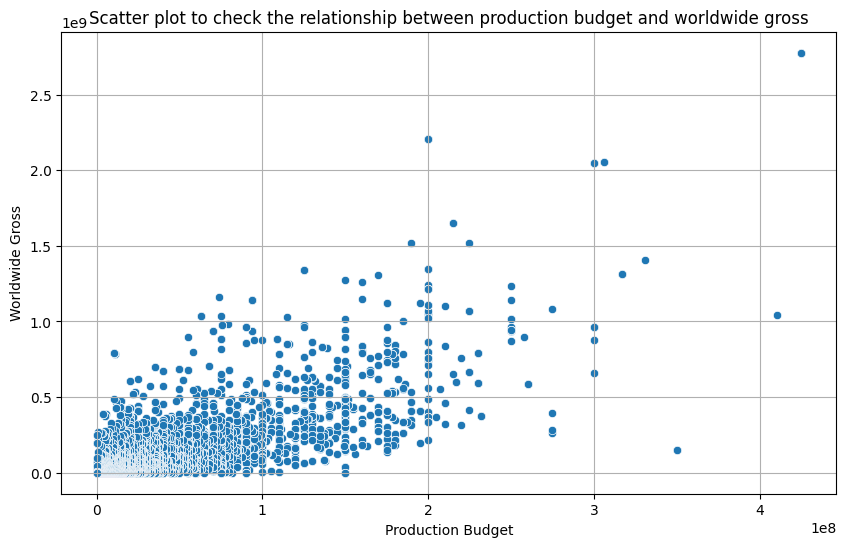

In [92]:
# Lets create scatter plot to visualize the correlation
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'production_budget',  y = 'worldwide_gross', data = new_movie_rating_df)
plt.title("Scatter plot to check the relationship between production budget and worldwide gross")
plt.xlabel("Production Budget")
plt.ylabel("Worldwide Gross")

plt.grid()
plt.show()

# Conclusion and Recommedation
There's a strong positive correlation between production budget and worldwide gross which further implies that spendong more on production is often associated with greater financial return..

# Perform an Hypothesis test to test whether genre has significant effect on the return on Investment.


In [156]:
# step 1: Define the Hypothesis
# Null Hypothesis H0 = There's no significance difference in the average return on investment across different genres
# Alternative Hypothesis H1 = There's a signficance difference in the average return on investment acorss different genres

# step 2: lets group the data by genre then extract the return on investment for each genre..
return_on_investment_genre = [group['return_on_investment'].dropna() for genre, group in new_movie_rating_df.groupby('genre')]

# step 3: lets perform an ANOVA test
f_stat, p_value = stats.f_oneway(* return_on_investment_genre)
print(f"F_statistic:{f_stat}")
print(f"P_value:{p_value}")

# step 4: Interpretation of the results
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: There's a statistical significant in the average return on investment across the genres")

else:
    print("Fail to reject the Null Hypothesis: There's no statistical significant in the average return on investment across the genres")

F_statistic:0.537533763763724
P_value:0.9288726476529576
Fail to reject the Null Hypothesis: There's no statistical significant in the average return on investment across the genres


# movie_gross_df

In [93]:
# data cleaning for the movie_gross dataset..

In [94]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [95]:
movie_gross_df.info()
print(movie_gross_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
(3387, 5)


In [96]:
movie_gross_df.isna().sum().sort_values(ascending = False)

foreign_gross     1350
domestic_gross      28
studio               5
title                0
year                 0
dtype: int64

# Cleaning the movie_gross_df 

In [97]:
# lets drop the rows with missing values.
movie_gross_df.dropna(subset = ['studio'], inplace = True)

# fill the missing values in domestic_gross_df with the median
movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].median(), inplace = True)

# convert the values in the foreign_gross to a float
movie_gross_df['foreign_gross'] = pd.to_numeric(movie_gross_df['foreign_gross'], errors = 'coerce')
movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].median(), inplace = True)

movie_gross_df.isna().sum().sort_values(ascending = False)

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

# Analysis of the movie_gross dataset

In [98]:
# lets create total revenue column..
movie_gross_df['total_gross'] = movie_gross_df['domestic_gross'] + movie_gross_df['foreign_gross']
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [99]:
# Metric question one: Which top 10 movies have the highest gross.
top_10_gross_movies = movie_gross_df[['studio', 'total_gross']].sort_values(by = 'total_gross', ascending = False).head(10)
print("The Top Ten movies with the highest gross include:\n", top_10_gross_movies)

The Top Ten movies with the highest gross include:
      studio   total_gross
727      BV  1.518900e+09
1875     BV  1.405400e+09
3080     BV  1.347000e+09
328      WB  1.341500e+09
2758     BV  1.332600e+09
3081   Uni.  1.309500e+09
1127     BV  1.276400e+09
2759     BV  1.263500e+09
3082     BV  1.242800e+09
1128     BV  1.214800e+09


In [100]:
# Metric question two: Which studios showed consistency in their high revenue over the years
# Filter the top 10 grossing movies
top_10_studio_highest_gross = movie_gross_df[['studio', 'total_gross', 'year']].sort_values(by = 'total_gross', ascending = False).head(10)
print("The top 10 movies which showed consistency in the:\n", top_10_studio_highest_gross)

The top 10 movies which showed consistency in the:
      studio   total_gross  year
727      BV  1.518900e+09  2012
1875     BV  1.405400e+09  2015
3080     BV  1.347000e+09  2018
328      WB  1.341500e+09  2011
2758     BV  1.332600e+09  2017
3081   Uni.  1.309500e+09  2018
1127     BV  1.276400e+09  2013
2759     BV  1.263500e+09  2017
3082     BV  1.242800e+09  2018
1128     BV  1.214800e+09  2013


In [101]:
# Here we check the consistency by counting occurrences of each studio in the top 10 list
studio_consistency = top_10_studio_highest_gross['studio'].value_counts()
print("Studios showing consistency in their occurences for the top 10 studios with highest gross:\n", studio_consistency)

Studios showing consistency in their occurences for the top 10 studios with highest gross:
 studio
BV      8
WB      1
Uni.    1
Name: count, dtype: int64


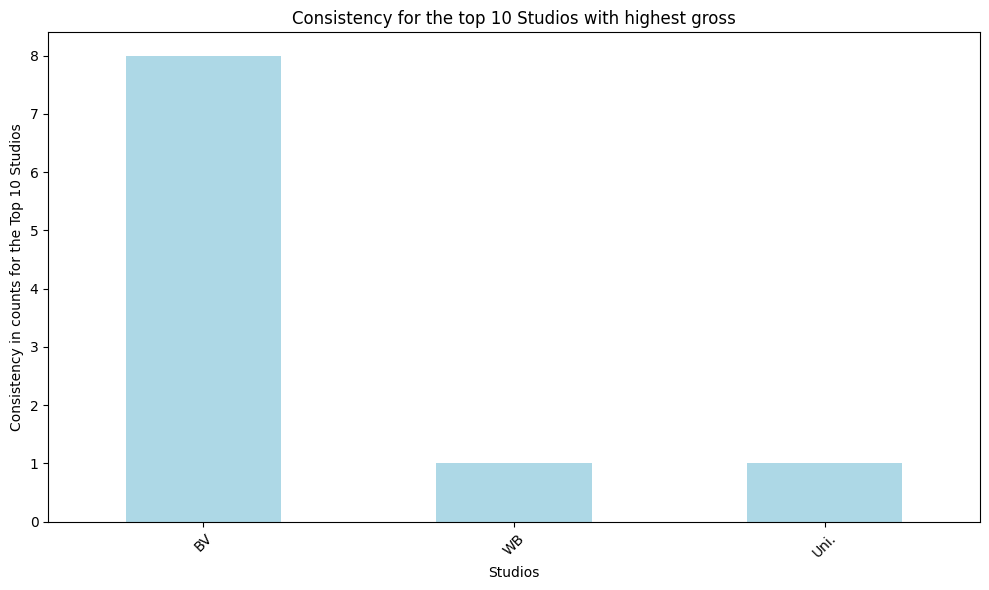

In [102]:
# lets visualize the consistency for the various studios
top_10_studio_highest_gross = movie_gross_df[['studio', 'total_gross']].sort_values(by = 'total_gross', ascending = False).head(10)
studio_consistency.plot(kind = 'bar', figsize = (10, 6), color = 'lightblue')
plt.title('Consistency for the top 10 Studios with highest gross')
plt.xlabel('Studios')
plt.ylabel('Consistency in counts for the Top 10 Studios')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

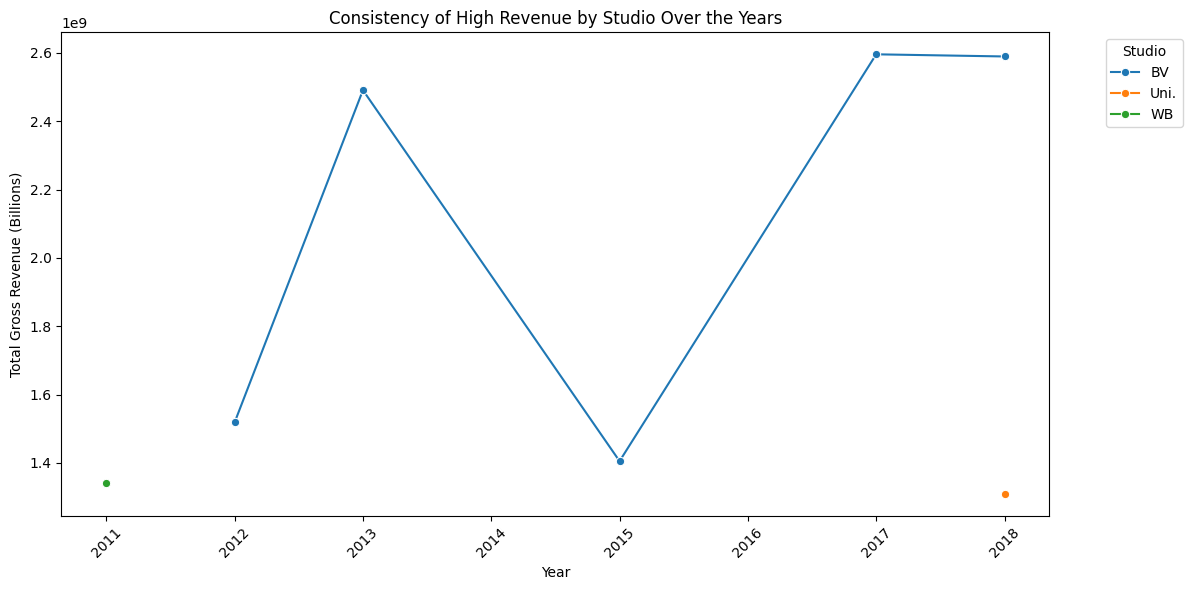

In [103]:
# Filter for 
top_10_gross_movies = movie_gross_df[['studio', 'total_gross', 'year']].sort_values(by = 'total_gross', ascending = False).head(10)

# Group by studio and year, then sum the total gross for each studio per year
studio_yearly_revenue = top_10_gross_movies.groupby(['studio', 'year'])['total_gross'].sum().reset_index()

# Create the line plot
plt.figure(figsize = (12, 6))
sns.lineplot(data = studio_yearly_revenue, x = 'year', y = 'total_gross', hue = 'studio', marker = 'o')

# Customize the plot
plt.title('Consistency of High Revenue by Studio Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue (Billions)')
plt.legend(title = 'Studio', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 45)
plt.tight_layout()

# Show the plot
plt.show()

# Conclusion:
For studio such as BV has the more counts for its consistency in the top 10 highest gross which implies that for this studio has effective strategies which allows them to generate high revenue over the years.

# Recommendations:
When venturing into the movie studio business we should consider prioritizing on investments for the studios that consistently generate High revenue which further means that by analyzing their successful strategies it could provide insights into best practices to improve on their total revenue generated.

Lets consider the studios showing positive trends in the total revenue generated, we could explore further on the opportunities to enhance the production to increase their revenue generated in the near future. It would also be necessary to track the performance for the top studios inorder to be aware of the shifting trends in the total revenue generated over the years therefore guiding the marketing strategies to be employed


In [104]:
# Metric question three: Which studio performs better domestically and internationally..
comparison_domestic_foreign = movie_gross_df.groupby('studio')[['domestic_gross', 'foreign_gross']].mean().head(10)
#comparison_domestic_foreign
print("Domestic vs. Foreign with better performing Studios:\n", comparison_domestic_foreign)

Domestic vs. Foreign with better performing Studios:
         domestic_gross  foreign_gross
studio                               
3D        6.100000e+06   9.900000e+06
A23       8.210000e+04   1.900000e+07
A24       6.616208e+06   1.649923e+07
ADC       1.241000e+05   1.900000e+07
AF        3.571500e+05   1.325000e+07
AGF       1.580000e+04   1.610000e+05
ALP       2.800000e+03   1.900000e+07
AM        2.370000e+05   1.900000e+07
AR        8.750000e+05   5.365000e+07
ATO       3.733750e+05   9.708675e+06


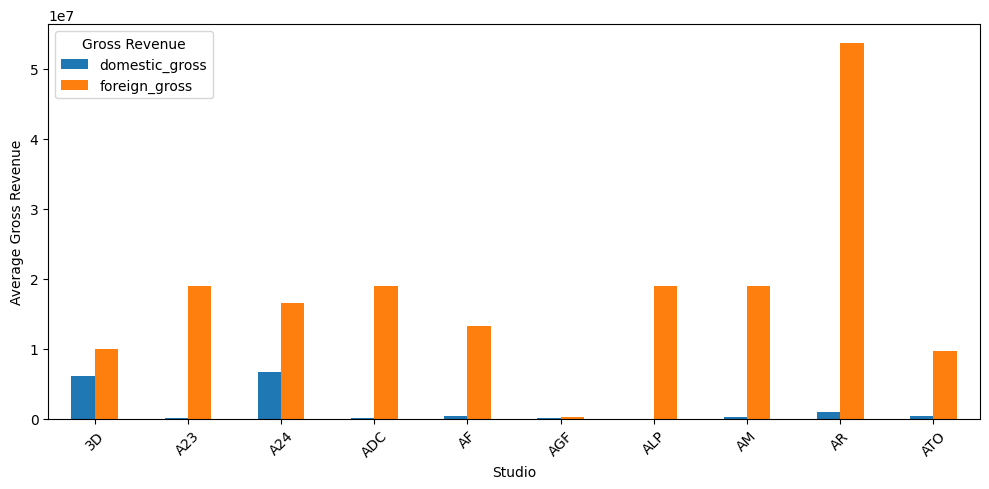

In [105]:
# Lets visualize the comparison between domestic and foreign gross based on the studio
comparison_domestic_foreign.plot(kind = 'bar', figsize = (10, 5))
plt.xlabel('Studio')
plt.ylabel('Average Gross Revenue')
plt.xticks(rotation = 45)
plt.legend(title = 'Gross Revenue')
plt.tight_layout()
plt.show()

# Conclusions:
Most studios have significantly higher foreign gross revenues compared to domestic gross revenue with studio AR having the highest foreign gross revenue
which indicates effective global marketing strategies within the international space.

For AGF studio shows significantly low average gross for both  domestic and foreign gross revenue.
For the visual comparison it allows ease of identification of which studios are maximazing their revenue opportunities in both domestic and foreign markets.

# Recommendations:
Lets focus on International markets since most studios have higher average gross revenue,  we could consider investing in international markets especially for the studios with lower foreign gross since that would provide insights into the pitfalls leading to lower foreign gross revenue hence improve their marketing strategies.

We should examine the strategies employed by the studios having a higher foreign gross revenues because in understanding these approaches we could adapt some of the marketing strategies to be used by other movie studios which are still growing.

# Querying the movie data from the Database

In [20]:
conn = sqlite3.connect('im.db')
cursor = conn.cursor()
cursor.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_name = cursor.fetchall()
table_name

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

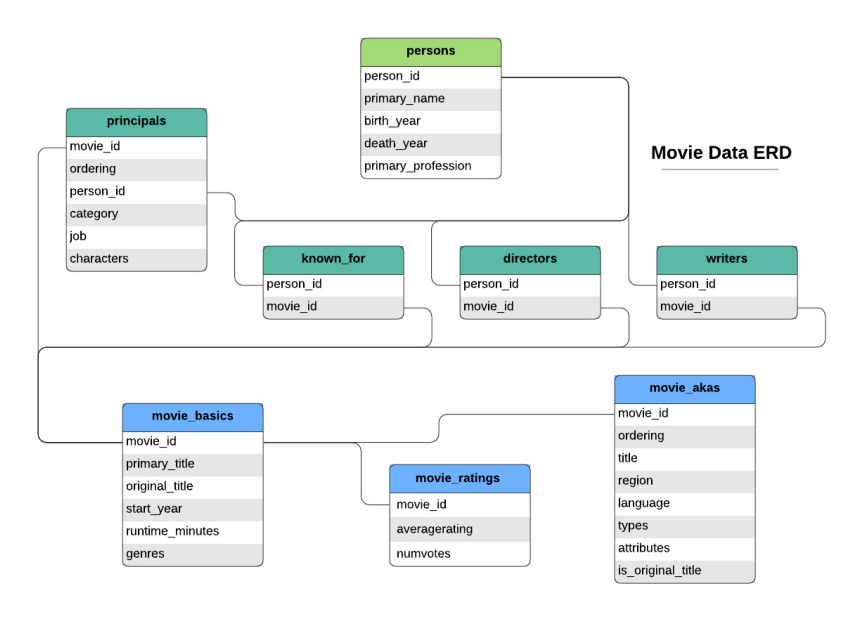

In [158]:
import matplotlib.image as mpimg
img = mpimg.imread('movie_data_erd.jpeg')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [30]:
# lets access the data in the database..
query1 = """SELECT * FROM movie_basics;"""
movie_basics_df = pd.read_sql(query1, conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [31]:
query2 = """ SELECT * FROM movie_ratings;"""
movie_rating_df = pd.read_sql(query2, conn)
movie_rating_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [63]:
# To get the average rating for each movie_id in descending order..
Q_1 = """
SELECT movie_id, averagerating, COUNT(numvotes) 
  FROM movie_ratings
  GROUP BY movie_id 
  ORDER BY averagerating DESC
  LIMIT 5;
"""
pd.read_sql(Q_1, conn)

,movie_id,averagerating,COUNT(numvotes)
0,tt9715646,10.0,1
1,tt8730716,10.0,1
2,tt7259300,10.0,1
3,tt7227500,10.0,1
4,tt6991826,10.0,1


In [32]:
query3 = """ SELECT * FROM directors;"""
director_df = pd.read_sql(query3, conn)
director_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [267]:
# To retrieve the top 10 movies based on the rating of 7.0 and the above along with the title and the genres..
q = """
SELECT primary_title, original_title, genres, averagerating
    FROM movie_basics
    JOIN movie_ratings
    USING (movie_id)
    WHERE averagerating >= 7.0
    GROUP BY genres
    ORDER BY averagerating DESC
    LIMIT 10;
"""
rated_df = pd.read_sql(q, conn) # find the genre with the highest rated movie then sort the
rated_df

,primary_title,original_title,genres,averagerating
0,From Shock to Awe,From Shock to Awe,"Documentary,War",9.7
1,Love on a Leash,Love on a Leash,"Documentary,Family,Romance",9.7
2,Foosballers,Foosballers,"Comedy,Documentary,Sport",9.7
3,Some Called Them Baby Killers... We Call Them ...,Some Called Them Baby Killers... We Call Them ...,"Documentary,Drama,War",9.4
4,Lost Conquest,Lost Conquest,"Comedy,Documentary,Fantasy",9.4
5,The Children of Genghis,Chingisiin huuhduud,"Adventure,Family",9.4
6,The Boys Are Back - Bandstand: The Broadway Mu...,The Boys Are Back - Bandstand: The Broadway Mu...,Musical,9.3
7,Sunakali,Sunakali,"Documentary,Family,Musical",9.3
8,Silent Drum,Silent Drum,"Documentary,Drama,Music",9.3
9,Hugo: A Hidden Past Revealed,Hugo: A Hidden Past Revealed,"Adventure,Documentary,History",9.3


In [269]:
_df = pd.DataFrame(rated_df)

In [ ]:
runtime_data['genres'] = runtime_data['genres'].dropna().apply(lambda x: x.split(','))

In [270]:
df.is

,primary_title,original_title,genres,averagerating
0,From Shock to Awe,From Shock to Awe,"Documentary,War",9.7
1,Love on a Leash,Love on a Leash,"Documentary,Family,Romance",9.7
2,Foosballers,Foosballers,"Comedy,Documentary,Sport",9.7
3,Some Called Them Baby Killers... We Call Them ...,Some Called Them Baby Killers... We Call Them ...,"Documentary,Drama,War",9.4
4,Lost Conquest,Lost Conquest,"Comedy,Documentary,Fantasy",9.4


In [266]:
q = """
SELECT genres, averagerating
    FROM movie_basics
    JOIN movie_ratings
    USING (movie_id)
    WHERE averagerating >= 7.0
    ORDER BY averagerating DESC
    LIMIT 10;
"""
rated_df = pd.read_sql(q, conn) # find the genre with the highest rated movie then sort the
rated_df

,genres,averagerating
0,Documentary,10.0
1,Documentary,10.0
2,"Crime,Documentary",10.0
3,Documentary,10.0
4,Documentary,10.0
5,Documentary,10.0
6,Documentary,10.0
7,Documentary,10.0
8,Drama,10.0
9,Documentary,10.0


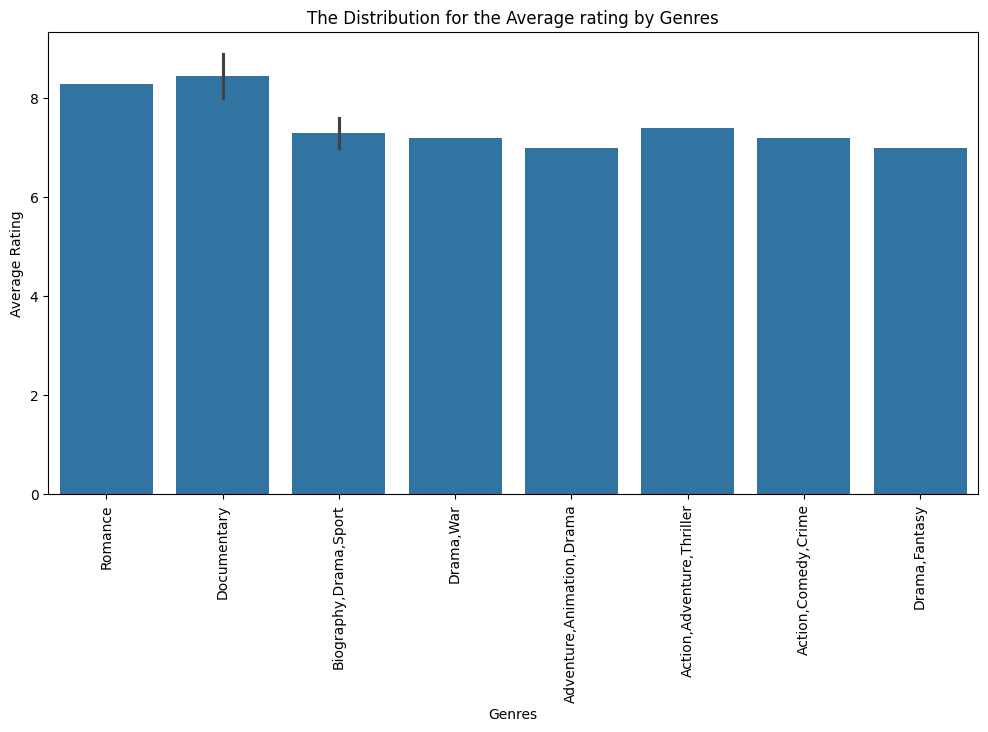

In [111]:
# lets visualize the data with showing how different movies have been distributed based on the rating
plt.figure(figsize = (12, 6))
sns.barplot(data = rated_df, x = 'genres', y = 'averagerating')
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('The Distribution for the Average rating by Genres')
plt.show()

In [162]:
# To get the highest rated movie in the dataset..
highest_rated_movie = rated_df.loc[df['averagerating'].idxmax()]
print(f"The best rated title movie include {highest_rated_movie}")

The best rated title movie include primary_title     Requiem voor een Boom
original_title    Requiem voor een Boom
genres                      Documentary
averagerating                      10.0
Name: 1, dtype: object


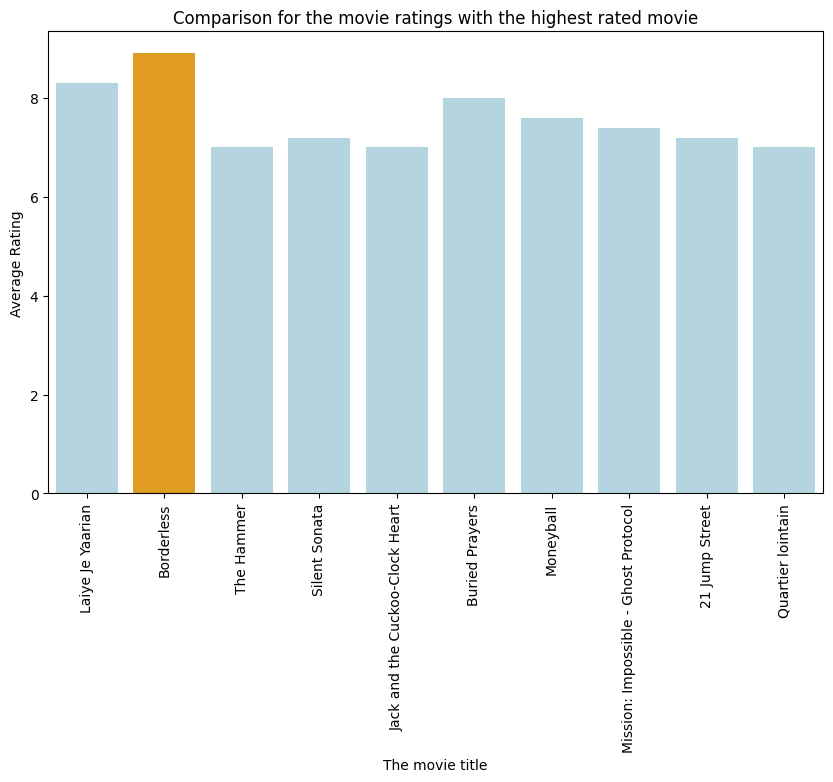

In [159]:
# Create a scatter to compare the highest rated movie with the entire dataset..
plt.figure(figsize = (10, 6))
sns.barplot(data = df, x = 'primary_title', y = 'averagerating', color = 'lightblue')
sns.barplot(x = [highest_rated_movie['primary_title']], y = [highest_rated_movie['averagerating']], color = 'orange')
plt.xticks(rotation=90)
plt.xlabel('The movie title')
plt.ylabel('Average Rating')
plt.title('Comparison for the movie ratings with the highest rated movie');

In [124]:
q1 = """
SELECT movie_id, start_year, genres, averagerating
   FROM movie_basics
   JOIN movie_ratings
   USING (movie_id)
   GROUP BY averagerating
   ORDER BY start_year DESC;
"""
df1 = pd.read_sql(q1, conn)
df1

,movie_id,start_year,genres,averagerating
0,tt9537008,2019,Drama,9.9
1,tt10121022,2019,Documentary,9.7
2,tt10011448,2019,Documentary,9.4
3,tt10080924,2019,Drama,9.2
4,tt10015432,2019,"Action,Comedy,Horror",8.4
...,...,...,...,...
86,tt0937353,2010,"Mystery,Romance",1.7
87,tt1516598,2010,Drama,1.6
88,tt1624391,2010,Thriller,1.5
89,tt1619016,2010,"Action,Sci-Fi",1.2


In [131]:
# To select the genre with the highest rated movie 
df_highest_rated = df1.sort_values(by = 'averagerating', ascending = False)
df_highest_rated.head()

,movie_id,start_year,genres,averagerating
11,tt10176328,2018,Documentary,10.0
0,tt9537008,2019,Drama,9.9
12,tt10177960,2018,Documentary,9.8
1,tt10121022,2019,Documentary,9.7
33,tt2901984,2014,"Animation,Documentary,Family",9.6


In [137]:
highest_rated_year =  df_highest_rated['start_year'].iloc[0]

print(f"The year with the highest rate was {highest_rated_year}")

The year with the highest rate was 2018


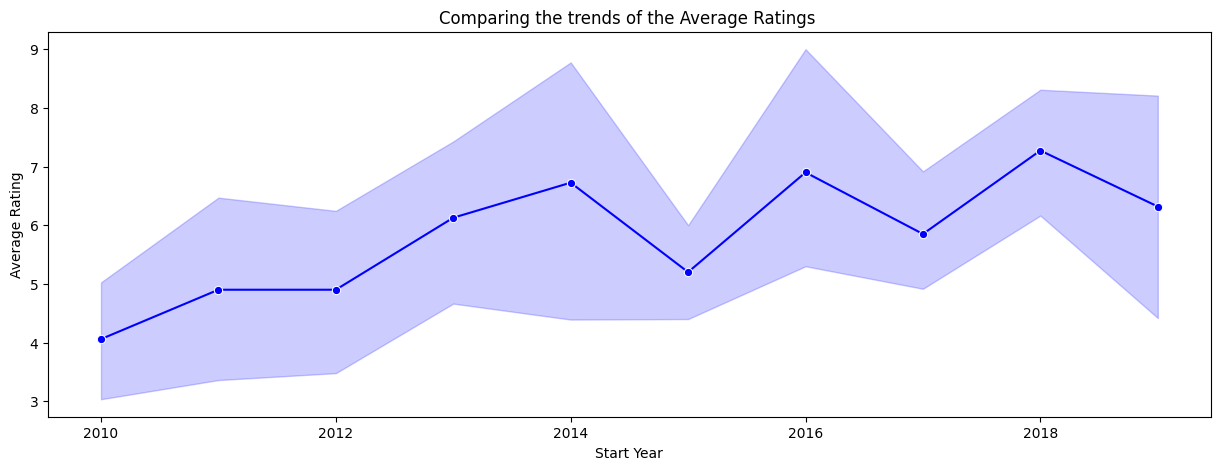

In [156]:
# create a line graph to compare the trends of the averageratings with the startyear..
plt.figure(figsize = (15, 5))
sns.lineplot(data = df_highest_rated, x = 'start_year', y = 'averagerating', marker='o', color='blue')
plt.xlabel('Start Year')
plt.ylabel('Average Rating')
plt.title('Comparing the trends of the Average Ratings ');